## Problem Statement

The dataset contains real estate sales data, including information on sale amounts, assessed values, property types, residential categories, towns, and sales ratios. The goal is to analyze the sales trends, identify patterns in property valuation and sales, and uncover insights into the performance of various towns and property types.

This analysis aims to:
- Understand the relationship between assessed values and sale amounts.
- Evaluate sales performance across different towns and residential types.
- Identify key trends and outliers in sales ratios.

Develop visualizations to facilitate intuitive decision-making for stakeholders in the real estate sector.
Using this data, actionable insights can be provided to stakeholders, including real estate investors, developers, and policymakers, to make informed decisions based on historical trends and patterns.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
re = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')
re.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [3]:
re.shape

(1097629, 14)

In [4]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [5]:
re.isnull().sum()

Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64

In [6]:
def calc_missing_percentage(df, column_name):
    missing_count = df[column_name].isnull().sum()
    total_count = len(df)
    missing_percentage = (missing_count / total_count)*100
    return f"{missing_percentage:.2f}%"

In [7]:
print(calc_missing_percentage(re, 'Non Use Code'))
print(calc_missing_percentage(re, 'Assessor Remarks'))
print(calc_missing_percentage(re, 'OPM remarks'))
print(calc_missing_percentage(re, 'Location'))

71.44%
84.40%
98.81%
72.84%


#### Missing Values

- After checking the count of missing values in percentage, Non Use Code has 71.44% missing values, Assessor Remarks has 84.40%, OPM remarks has 98.81% and Location 72.84%. 
- Also looking at the values of these columns does not make any sense and seems to be redundant. So looking at these columns, we will drop these columns as it wont help in analysis.

In [8]:
# Lets drop the columns on a new dataframe.

re1 = re.copy()
re1.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [9]:
re1.drop(columns=['Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location'], inplace=True)
re1.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family


In [10]:
re1.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    398389
dtype: int64

In [11]:
re1.shape

(1097629, 10)

In [12]:
re1['Property Type'].value_counts()

Single Family     401612
Residential       151064
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         7824
Commercial          5987
Four Family         2150
Apartments          1327
Industrial           795
Public Utility        10
Name: Property Type, dtype: int64

In [13]:
re1['Residential Type'].value_counts()

Single Family    508044
Condo            136822
Two Family        34848
Three Family      16567
Four Family        2959
Name: Residential Type, dtype: int64

In [14]:
re1[re1['Residential Type'] == 'Single Family']

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family
6,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family
7,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
1097623,221052,2022,08/03/2023,Norwalk,11 ORLANDO PLACE,274580.0,803000.0,0.341900,Residential,Single Family
1097624,2200073,2022,10/11/2022,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.558800,Residential,Single Family
1097625,220369,2022,09/29/2023,Wethersfield,37 LUCA LN,20650.0,760857.0,0.027100,Residential,Single Family
1097627,22396,2022,09/26/2023,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.698000,Residential,Single Family


In [15]:
re1[re1['Property Type'] == 'Residential']

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.6819,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
1097624,2200073,2022,10/11/2022,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.5588,Residential,Single Family
1097625,220369,2022,09/29/2023,Wethersfield,37 LUCA LN,20650.0,760857.0,0.0271,Residential,Single Family
1097626,2200470,2022,01/09/2023,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,0.6040,Residential,Condo
1097627,22396,2022,09/26/2023,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.6980,Residential,Single Family


#### Observation

- After looking closely, found out that all Residential Type with 'Single Family', 'Two Family', 'Three Family', 'Four Family', 'Condo' values has Property Type as 'Residential'. So instead of keeping different values, we will combine and replace 'Single Family', 'Two Family', 'Three Family', 'Four Family', 'Condo' with 'Residential'

In [16]:
re1['Property Type'] = re1['Property Type'].replace({
    'Single Family': 'Residential',
    'Two Family': 'Residential',
    'Three Family': 'Residential',
    'Four Family': 'Residential',
    'Condo': 'Residential'
})

In [17]:
re1['Property Type'].value_counts()

Residential       699240
Vacant Land         7824
Commercial          5987
Apartments          1327
Industrial           795
Public Utility        10
Name: Property Type, dtype: int64

In [18]:
re1['Residential Type'].value_counts()

Single Family    508044
Condo            136822
Two Family        34848
Three Family      16567
Four Family        2959
Name: Residential Type, dtype: int64

In [19]:
re1.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family


In [20]:
re1[re1['Property Type'] == 'Public Utility']

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
92,20000275,2020,09/20/2021,Granby,30 FIRETOWN RD,154210.0,315000.0,0.489500,Public Utility,NaN
13637,201322,2020,09/01/2021,Griswold,29 RICHARD AVE,34510.0,1400000.0,0.024650,Public Utility,NaN
32173,20049,2020,11/16/2020,Plainfield,45 SPAULDING RD,117920.0,39000.0,3.023590,Public Utility,NaN
55208,20193,2020,05/26/2021,Thompson,0 NEW RD,42200.0,59950.0,0.703900,Public Utility,NaN
56906,20412,2020,05/26/2021,Waterford,296 WILLETTS AVE EXT,18490.0,34594.0,0.534486,Public Utility,NaN
1010717,21010,2021,11/08/2021,Chester,41 GOOSE HILL RD,108010.0,7500.0,14.401300,Public Utility,NaN
1012223,210522,2021,02/07/2022,Bristol,387 WILLIS STREET,88750.0,50000.0,1.775000,Public Utility,NaN
1031704,210063,2021,06/02/2022,Kent,SEGAR MTN RD,50800.0,20000.0,2.540000,Public Utility,NaN
1068778,22094,2022,06/07/2023,Haddam,CEDAR LAKE RD,99860.0,180000.0,0.554700,Public Utility,NaN
1089762,22004,2022,10/14/2022,Salisbury,LIBRARY STREET,10000.0,30000.0,0.333300,Public Utility,NaN


#### Null values is Residental Type column

- As we can now see that if the property type is Residential, then we have Residentail Type as Three Family, Two Family, Condo, etc. But other values in Property Type like Vacant Land, Commercial, Apartment, etc., is not a Resident, so does not have any Residential Type and have null values. So we'll replace these null values as 'Non-Residential'.  

In [21]:
re1['Residential Type'] = re1.apply(lambda x: 'Non-Residential' if x['Property Type'] != 'Residential' and 
                                    pd.isnull(x['Residential Type']) else x['Residential Type'], axis=1)

In [22]:
re1['Residential Type'].value_counts()

Single Family      508044
Non-Residential    398389
Condo              136822
Two Family          34848
Three Family        16567
Four Family          2959
Name: Residential Type, dtype: int64

In [23]:
re1.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type         0
dtype: int64

In [24]:
re1[re1['Property Type'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
274,10573,2001,01/10/2002,Danbury,166 OLD BROOKFIELD RD,81100.0,180000.0,0.450556,NaN,Non-Residential
275,10540,2001,08/16/2002,Guilford,6 LAUREL RDG,187530.0,386500.0,0.485201,NaN,Non-Residential
278,10177,2001,02/27/2002,Bethel,211 LEXINGTON BLVD,47600.0,109900.0,0.433121,NaN,Non-Residential
280,10050,2001,06/18/2002,Hampton,741 POMFRET RD,60260.0,145500.0,0.414158,NaN,Non-Residential
281,10195,2001,01/02/2002,Branford,28 SUNDANCE,42210.0,65900.0,0.640516,NaN,Non-Residential
...,...,...,...,...,...,...,...,...,...,...
997211,19150,2019,01/13/2020,Newtown,22 WASHINGTON AVENUE,53640.0,122500.0,0.437900,NaN,Non-Residential
997219,190242,2019,09/18/2020,Weston,OLD HYDE ROAD,181440.0,150000.0,1.209600,NaN,Non-Residential
997220,19000067,2019,05/19/2020,New Hartford,LOT 2 DINGS RD,87955.0,35000.0,2.513000,NaN,Non-Residential
997228,190713,2019,06/01/2020,New Haven,1083 WHALLEY AV,262220.0,325000.0,0.806800,NaN,Non-Residential


#### Null values in Property Type

- As we have 382446 null values in Property Type and we will not be able to find if those null values are Commercial, Residential, Industrial or any other value. So these will be a redundant values for us and will not help in analysis. So we'll drop the null values from Property Type.

In [25]:
re1.dropna(subset=['Property Type'], inplace=True)

In [26]:
re1.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             4
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

In [27]:
re1.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Non-Residential
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family


In [28]:
re1.shape

(715183, 10)

In [29]:
re1[re1['Address'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
409818,60474,2006,07/30/2007,Farmington,NaN,0.0,453369.0,0.0000,Residential,Single Family
862016,170165,2017,12/08/2017,Manchester,NaN,129300.0,224000.0,0.5772,Residential,Two Family
891388,172767,2017,01/12/2018,Shelton,NaN,227500.0,500000.0,0.4550,Residential,Condo
895205,17001,2017,10/02/2017,North Haven,NaN,193130.0,242000.0,0.7980,Residential,Single Family


#### Null values in Address column

- As there are 4 null values in address left, so we'll drop them.

In [30]:
re1.dropna(subset=['Address'], inplace=True)

In [31]:
re1.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

In [32]:
re1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715179 entries, 0 to 1097628
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     715179 non-null  int64  
 1   List Year         715179 non-null  int64  
 2   Date Recorded     715179 non-null  object 
 3   Town              715179 non-null  object 
 4   Address           715179 non-null  object 
 5   Assessed Value    715179 non-null  float64
 6   Sale Amount       715179 non-null  float64
 7   Sales Ratio       715179 non-null  float64
 8   Property Type     715179 non-null  object 
 9   Residential Type  715179 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 60.0+ MB


In [33]:
# Let's convert the Date Recorded column to DateTime format.

re1['Date Recorded'] = pd.to_datetime(re1['Date Recorded'])

In [34]:
re1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715179 entries, 0 to 1097628
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     715179 non-null  int64         
 1   List Year         715179 non-null  int64         
 2   Date Recorded     715179 non-null  datetime64[ns]
 3   Town              715179 non-null  object        
 4   Address           715179 non-null  object        
 5   Assessed Value    715179 non-null  float64       
 6   Sale Amount       715179 non-null  float64       
 7   Sales Ratio       715179 non-null  float64       
 8   Property Type     715179 non-null  object        
 9   Residential Type  715179 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 60.0+ MB


In [35]:
re1.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Non-Residential
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family


In [36]:
re1.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,7.151790e+05,715179.000000,7.151790e+05,7.151790e+05,7.151790e+05
mean,7.863785e+05,2014.855878,2.633383e+05,4.009728e+05,5.009487e+00
std,9.263454e+06,4.938426,1.368062e+06,6.055763e+06,1.661413e+03
min,2.100000e+01,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.158750e+04,2011.000000,1.097600e+05,1.550000e+05,5.513000e-01
50%,1.407540e+05,2015.000000,1.597000e+05,2.450000e+05,6.668449e-01
75%,1.909350e+05,2019.000000,2.492700e+05,3.899000e+05,8.147104e-01
max,2.000500e+09,2022.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [37]:
re1[re1['Assessed Value'] == 0]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
610,200233,2020,2021-01-07,Groton,69 A ST,0.0,29000.0,0.0,Residential,Single Family
934,200630,2020,2021-07-23,Groton,3 WATER ST UNIT 304,0.0,600000.0,0.0,Residential,Condo
1055,2000502,2020,2021-08-13,Cheshire,56 MACKENZIE WILLOW TERR,0.0,624382.0,0.0,Residential,Condo
1260,200144,2020,2021-07-07,Killingworth,2 WOODLAND TRAIL,0.0,184995.0,0.0,Residential,Single Family
1279,200019,2020,2020-11-18,Beacon Falls,15 TWIN OAKS TRAIL,0.0,506581.0,0.0,Residential,Condo
...,...,...,...,...,...,...,...,...,...,...
1095704,220076,2022,2022-12-29,Windham,NO WINDHAM RD,0.0,291500.0,0.0,Vacant Land,Non-Residential
1096314,220081,2022,2023-04-24,Woodstock,LYON HILL RD,0.0,67000.0,0.0,Vacant Land,Non-Residential
1096431,220269,2022,2023-03-10,Southington,60 SOUTH RD (TP),0.0,185995.0,0.0,Residential,Single Family
1096592,220418,2022,2023-04-04,Stratford,51 VOUGHT PLACE,0.0,135000.0,0.0,Apartments,Non-Residential


In [38]:
re1[re1['Sale Amount'] == 0]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
386833,60030,2006,2007-09-05,Norfolk,5 ROUGHLAND ROAD,135400.0,0.0,0.0,Residential,Single Family
394951,60410,2006,2007-08-30,New London,"72, 78 & 80 JEFFERSON AVENUE",213570.0,0.0,0.0,Residential,Single Family
397099,62613,2006,2007-09-28,Bridgeport,603 UNION AVE,68740.0,0.0,0.0,Residential,Two Family
402527,60205,2006,2007-03-12,New London,28 PARKWAY SOUTH,142940.0,0.0,0.0,Residential,Single Family
403000,60430,2006,2007-09-17,New London,327 MONTAUK AVENUE,140560.0,0.0,0.0,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
900875,170108,2017,2018-04-20,Oxford,63 ONEILL RD,184600.0,0.0,0.0,Residential,Single Family
902551,180046,2018,2018-10-29,Berlin,63 STONY MILL LANE,137600.0,0.0,0.0,Residential,Condo
914968,180006,2018,2018-10-05,Winchester,53 CENTER ST,79100.0,0.0,0.0,Residential,Two Family
921566,180032,2018,2018-10-31,Winchester,131 BELVIDERE,75950.0,0.0,0.0,Residential,Single Family


In [39]:
re1[re1['Sales Ratio'] == 0]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
610,200233,2020,2021-01-07,Groton,69 A ST,0.0,29000.0,0.0,Residential,Single Family
934,200630,2020,2021-07-23,Groton,3 WATER ST UNIT 304,0.0,600000.0,0.0,Residential,Condo
1055,2000502,2020,2021-08-13,Cheshire,56 MACKENZIE WILLOW TERR,0.0,624382.0,0.0,Residential,Condo
1260,200144,2020,2021-07-07,Killingworth,2 WOODLAND TRAIL,0.0,184995.0,0.0,Residential,Single Family
1279,200019,2020,2020-11-18,Beacon Falls,15 TWIN OAKS TRAIL,0.0,506581.0,0.0,Residential,Condo
...,...,...,...,...,...,...,...,...,...,...
1095704,220076,2022,2022-12-29,Windham,NO WINDHAM RD,0.0,291500.0,0.0,Vacant Land,Non-Residential
1096314,220081,2022,2023-04-24,Woodstock,LYON HILL RD,0.0,67000.0,0.0,Vacant Land,Non-Residential
1096431,220269,2022,2023-03-10,Southington,60 SOUTH RD (TP),0.0,185995.0,0.0,Residential,Single Family
1096592,220418,2022,2023-04-04,Stratford,51 VOUGHT PLACE,0.0,135000.0,0.0,Apartments,Non-Residential


#### Assessed Value and Sale Amount column

- As we saw that Assessed Value and Sale Amount has values as 0, usually in the world of real estate, the value of the property can never be 0, even if the property is under dispute or is under government. This either could be the possibility that the property was never assessed or the owner had no intention of selling the property. 

- As these 0 values will not help us in getting insights about the data and may divert the analysis, it would be better to drop such values. 

In [40]:
len(re1[re1['Assessed Value'] == 0])

2314

In [41]:
len(re1[re1['Sale Amount'] == 0])

112

In [42]:
len(re1[re1['Sales Ratio'] == 0])

2436

In [43]:
zero_combined = re1[(re1['Assessed Value'] == 0) | (re1['Sale Amount'] == 0)]
print(f"Number of rows affected: {len(zero_combined)}")


Number of rows affected: 2426


In [44]:
re1 = re1[(re1['Assessed Value'] != 0) & (re1['Sale Amount'] != 0)]

In [45]:
print(len(re1[re1['Assessed Value'] == 0]))
print(len(re1[re1['Sale Amount'] == 0]))
print(len(re1[re1['Sales Ratio'] == 0]))

0
0
10


In [46]:
re1[re1['Sales Ratio'] == 0]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
9227,200088,2020,2021-02-16,Mansfield,12 SILO RD WEST,10.0,120000.0,0.0,Residential,Condo
17116,200186,2020,2021-06-14,Mansfield,9 VALLEY VIEW DR,5.0,143995.0,0.0,Residential,Single Family
38016,2000798,2020,2021-01-15,Stamford,93 GLENBROOK ROAD GARAGE #2,6970.0,72000000.0,0.0,Residential,Condo
997837,22122,2022,2023-02-06,North Haven,40 NEWBURY CT,1.0,469900.0,0.0,Residential,Condo
1004901,22120,2022,2023-02-03,North Haven,16 NEWBURY CT,1.0,448955.0,0.0,Residential,Condo
1035446,210091,2021,2022-08-25,Sterling,BAILEY RD,120.0,3225000.0,0.0,Vacant Land,Non-Residential
1036026,210808,2021,2022-05-10,New Haven,190 WOOSTER ST UNIT 25,1.0,110000.0,0.0,Residential,Condo
1057698,21513,2021,2022-08-23,Ridgefield,6 NEW ST,10.0,1450000.0,0.0,Residential,Single Family
1067792,22116,2022,2023-02-01,North Haven,22 NEWBURY CT,1.0,459900.0,0.0,Residential,Condo
1077325,220020,2022,2022-10-06,New Haven,100 YORK ST UNIT 7-J,1.0,35000.0,0.0,Residential,Condo


In [47]:
re1 = re1[re1['Sales Ratio'] != 0]

In [48]:
print(len(re1[re1['Assessed Value'] == 0]))
print(len(re1[re1['Sale Amount'] == 0]))
print(len(re1[re1['Sales Ratio'] == 0]))

0
0
0


In [49]:
re1.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,7.127430e+05,712743.000000,7.127430e+05,7.127430e+05,7.127430e+05
mean,7.866217e+05,2014.863790,2.641847e+05,4.010267e+05,5.026608e+00
std,9.273346e+06,4.933945,1.370133e+06,6.065429e+06,1.664250e+03
min,2.100000e+01,2006.000000,1.000000e+00,1.000000e+00,4.130000e-06
25%,8.000200e+04,2011.000000,1.101900e+05,1.550000e+05,5.527000e-01
50%,1.407780e+05,2015.000000,1.600700e+05,2.450000e+05,6.676000e-01
75%,1.909470e+05,2019.000000,2.497000e+05,3.894020e+05,8.155814e-01
max,2.000500e+09,2022.000000,8.815100e+08,5.000000e+09,1.226420e+06


#### Observation

- Assessed Value and Sale Amount minimum value is 1 which is highly unlikely in the real world real estate transaction.
- The mean and std deviation for both the columns is heavily skewed due to outliers.
- Extreme values in Assessed Value, Sale Amount and Sales Ratio need further investigation as they can disort analysis.

In [50]:
low_values = re1[(re1['Assessed Value'] <= 1) | (re1['Sale Amount'] <= 1)]
low_values

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
58839,20323,2020,2021-04-16,Waterford,ROBERTS COURT,1.0,3500.0,2.857140e-04,Vacant Land,Non-Residential
409088,60005,2006,2006-10-05,Haddam,232 PLAINS RD,83280.0,1.0,8.328000e+04,Residential,Single Family
420432,60099,2006,2007-03-01,Mansfield,MEADOWBROOK,162050.0,1.0,1.620500e+05,Residential,Single Family
421361,60043,2006,2007-03-19,Salisbury,209 MAIN ST,1226420.0,1.0,1.226420e+06,Residential,Single Family
422650,60442,2006,2007-09-14,Guilford,1394 LITTLE MDW RD,198960.0,1.0,1.989600e+05,Residential,Single Family
424070,60190,2006,2007-03-02,Newtown,17 WHITEWOOD RD,473780.0,1.0,4.737800e+05,Residential,Single Family
425852,60213,2006,2007-03-29,Newtown,206 BERKSHIRE RD,305910.0,1.0,3.059100e+05,Residential,Single Family
678359,130111,2013,2014-09-04,Westbrook,5 PINE CONE DR,1.0,80830.0,1.240000e-05,Residential,Single Family
681229,130104,2013,2014-08-25,Westbrook,9 OAK DR,1.0,41680.0,2.400000e-05,Residential,Single Family
893157,180020,2018,2018-10-29,Beacon Falls,146 MUNSON ROAD,241910.0,1.0,2.419100e+05,Residential,Single Family


In [51]:
# Dropping the above rows as the number of row count is small and clearly invalid.
re1 = re1[(re1['Assessed Value']> 1) & (re1['Sale Amount']> 1)]

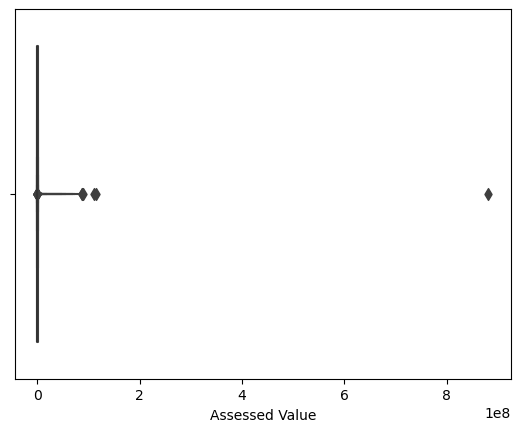

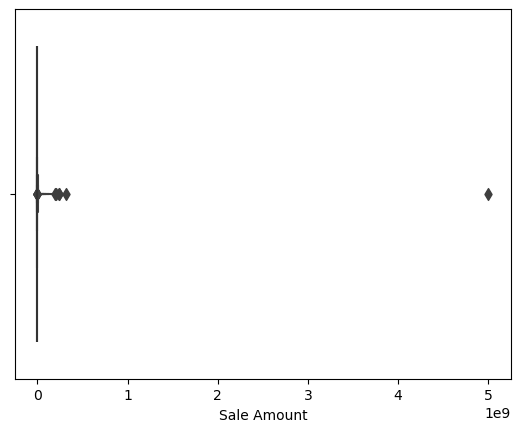

In [52]:
sns.boxenplot(x=re1['Assessed Value'])
plt.show()

sns.boxenplot(x=re1['Sale Amount'])
plt.show()

In [53]:
Q1_assessed = re1['Assessed Value'].quantile(0.25)
Q3_assessed = re1['Assessed Value'].quantile(0.75)
IQR_assessed = Q3_assessed - Q1_assessed

Q1_sale = re1['Sale Amount'].quantile(0.25)
Q3_sale = re1['Sale Amount'].quantile(0.75)
IQR_sale = Q3_sale - Q1_sale

lower_bound_assessed = Q1_assessed - 1.5 * IQR_assessed
upper_bound_assessed = Q3_assessed + 1.5 * IQR_assessed

lower_bound_sale = Q1_sale - 1.5 * IQR_sale
upper_bound_sale = Q3_sale + 1.5 * IQR_sale

re2 = re1[
    (re1['Assessed Value'] >= lower_bound_assessed) &
    (re1['Assessed Value'] <= upper_bound_assessed) &
    (re1['Sale Amount'] >= lower_bound_sale) &
    (re1['Sale Amount'] <= upper_bound_sale)
]

In [54]:
re2['Sales Ratio'] = re2['Sale Amount'] / re2['Assessed Value']

In [55]:
re2.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,6.379800e+05,637980.000000,637980.000000,637980.000000,637980.000000
mean,7.975028e+05,2014.829316,166525.598810,251141.996638,2.042189
std,9.482929e+06,4.906951,87935.190469,144843.128333,31.611702
min,2.100000e+01,2006.000000,5.000000,10.000000,0.000097
25%,8.002000e+04,2011.000000,105420.000000,148000.000000,1.223367
50%,1.408490e+05,2015.000000,148940.000000,226000.000000,1.496345
75%,1.907422e+05,2019.000000,212500.000000,331000.000000,1.800077
max,2.000500e+09,2022.000000,458920.000000,741000.000000,8571.428571


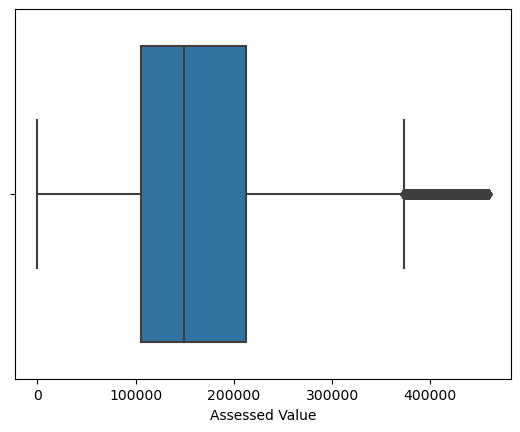

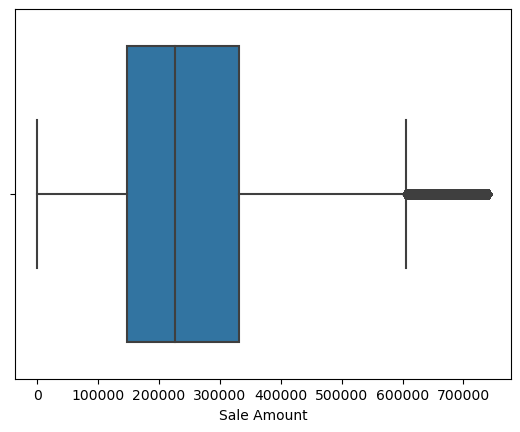

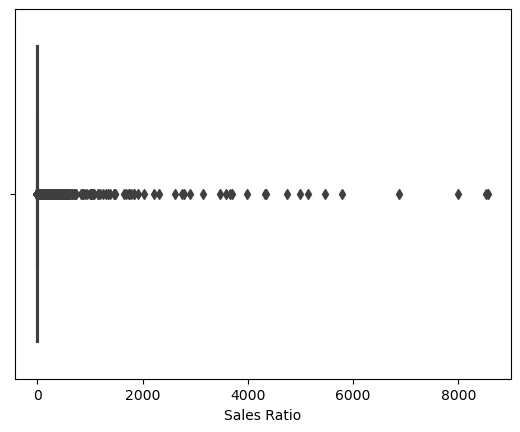

In [56]:
sns.boxplot(x=re2['Assessed Value'])
plt.show()

sns.boxplot(x=re2['Sale Amount'])
plt.show()

sns.boxplot(x=re2['Sales Ratio'])
plt.show()

#### Observation

- The maximum values of both the columns, Assessed Value and Sale Amount are now within a reasonable range.
- The mean and median of both ethe columns are much closer, indicating less skewed distribution after handling outliers. 
- The max value for Sales Ratio 8571 is still unusually high compared to 75th percentile 1.8. And the mean 2.04 seems skewed by the presence of few extreme values. So lets clean the Sales Ratio column now.

In [57]:
Q1_ratio = re1['Sales Ratio'].quantile(0.25)
Q3_ratio = re1['Sales Ratio'].quantile(0.75)
IQR_ratio = Q3_ratio - Q1_ratio

lower_bound_ratio = Q1_ratio - 1.5 * IQR_ratio
upper_bound_ratio = Q3_ratio + 1.5 * IQR_ratio

re2 = re2[
    (re2['Sales Ratio'] >= lower_bound_ratio) &
    (re2['Sales Ratio'] <= upper_bound_ratio)
]

In [58]:
re2.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.506260e+05,150626.000000,150626.000000,150626.000000,150626.000000
mean,4.627119e+05,2013.325495,160297.926938,145562.178389,0.883395
std,7.460129e+06,3.961737,87698.049240,97988.815215,0.261669
min,8.200000e+01,2006.000000,2000.000000,1155.000000,0.158531
25%,9.004400e+04,2010.000000,101430.000000,75000.000000,0.710277
50%,1.204885e+05,2013.000000,140070.000000,125000.000000,0.950438
75%,1.605770e+05,2016.000000,199010.000000,190000.000000,1.103531
max,1.710011e+09,2022.000000,458920.000000,552000.000000,1.209897


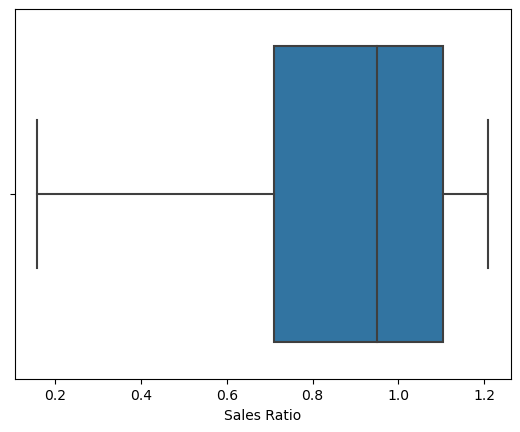

In [59]:
sns.boxplot(x=re2['Sales Ratio'])
plt.show()

In [60]:
re2.shape

(150626, 10)

#### Visualisation

- Now that the Assessed Value, Sale Amount and Sales Ratio is cleaned and the outliers has been removed the data, we can start the visualisation of the same.

<Axes: xlabel='Assessed Value', ylabel='Sale Amount'>

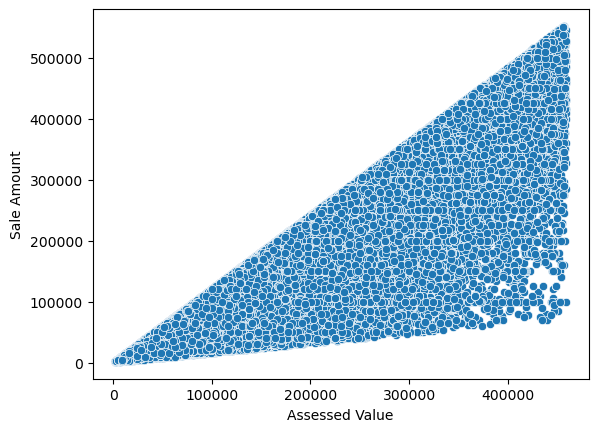

In [61]:
sns.scatterplot(x= 'Assessed Value', y= 'Sale Amount', data= re2)

<Axes: xlabel='Sales Ratio', ylabel='Sale Amount'>

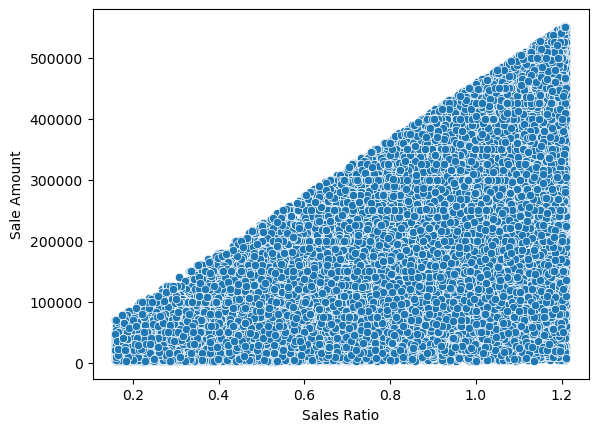

In [62]:
sns.scatterplot(x= 'Sales Ratio', y= 'Sale Amount', data= re2)

In [63]:
re2[['Assessed Value', 'Sale Amount']].corr()

,Assessed Value,Sale Amount
Assessed Value,1.000000,0.888841
Sale Amount,0.888841,1.000000


<Axes: xlabel='Assessed Value', ylabel='Sale Amount'>

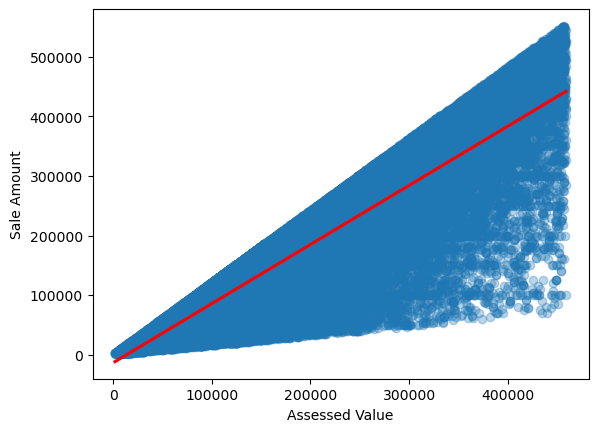

In [64]:
sns.regplot(x='Assessed Value', y='Sale Amount', data=re2, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})


<Axes: xlabel='Sales Ratio Log', ylabel='Sale Amount'>

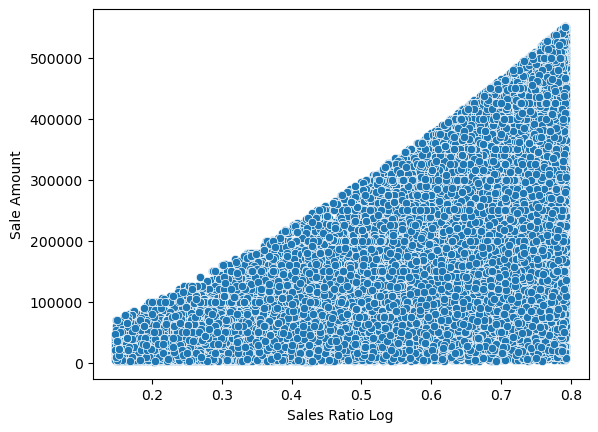

In [65]:
re2['Sales Ratio Log'] = np.log1p(re2['Sales Ratio'])
sns.scatterplot(x='Sales Ratio Log', y='Sale Amount', data=re2)


<Axes: title={'center': 'Average Sales Ratio Over Time'}, xlabel='List Year'>

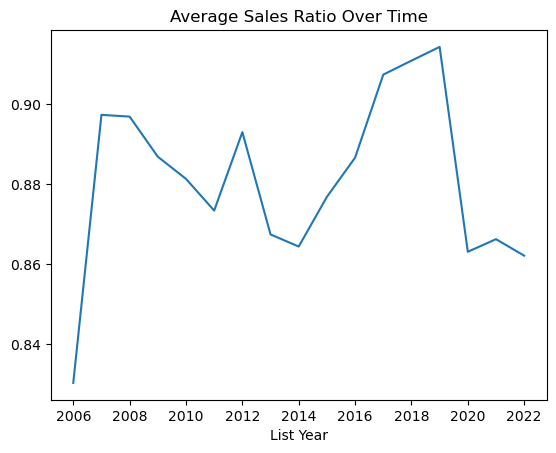

In [67]:
re2.groupby('List Year')['Sales Ratio'].mean().plot(kind= 'line', title= 'Average Sales Ratio Over Time')

In [68]:
# Save the cleaned DataFrame to an Excel file
re2.to_excel('Cleaned_Real_Estate_Sales.xlsx', index=False)
print("File saved successfully!")

File saved successfully!
